In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
%%time
path = '/datb/16011015/ExoGAN_data/selection//'
data = np.load(path+'first_chunks_25_percent.npy')
np.random.shuffle(data) # shuffle the array, make sure the distribution is random (by index atleast)

CPU times: user 47.3 s, sys: 12.6 s, total: 59.9 s
Wall time: 1min


In [3]:
"""
data contains 10k dictionaries of 50 chunks
"""
data.shape

(50, 25000)

In [4]:
data = data.flatten()

data.shape

(1250000,)

# Plot spectra

In [5]:
wavelengths = ke.load_wavelengths()

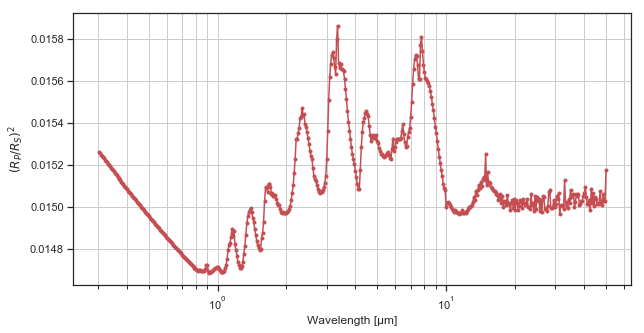

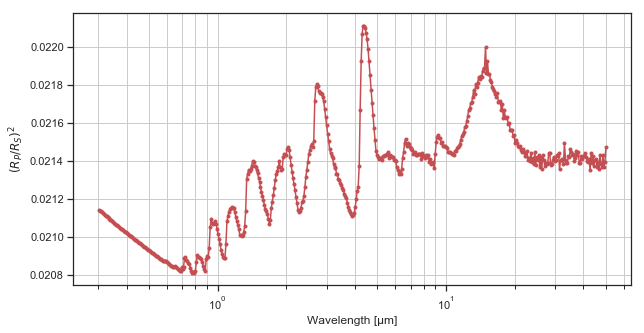

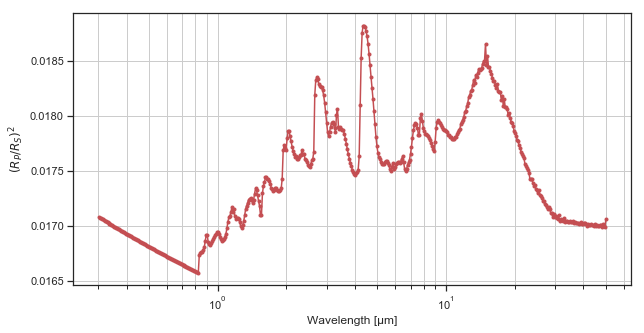

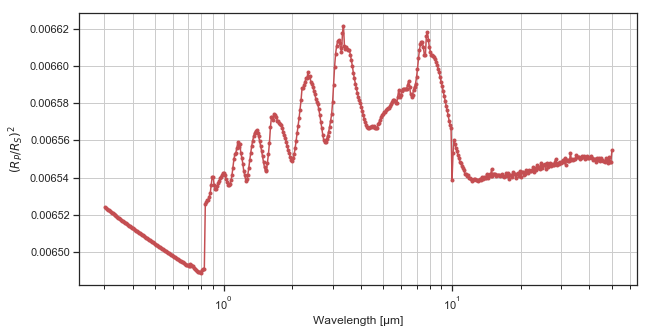

In [6]:
n = 4 # number of spectra to plot

indices = np.random.randint(0, len(data), size=n)

spectra = [data[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths


for i in range(n):
    ke.plot_spectrum(df.x, df[i])

(0.015, 0.03)

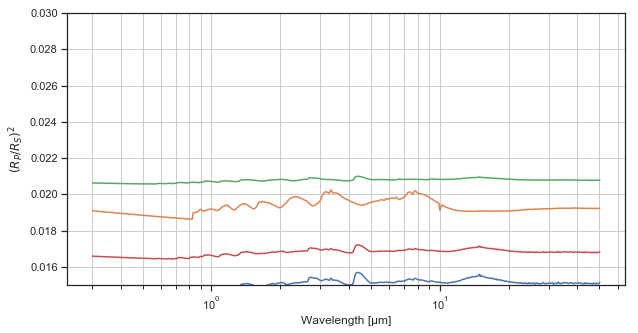

In [7]:
"""
Do the same thing but put it in one figure (with more spectra)
"""

# Grab a new sample

n = 5 # number of spectra to plot

indices = np.random.randint(0, len(data), size=n)

spectra = [data[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths

i=0
y = df[i].values.reshape(-1,1)
y.shape

# Plot the sample

plt.figure(figsize=(10,5))

for i in range(n):
    plt.plot(df.x, df[i])
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'$(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')
    

plt.xscale('log')

plt.ylim((0.015,0.03))

(0.3, 16)

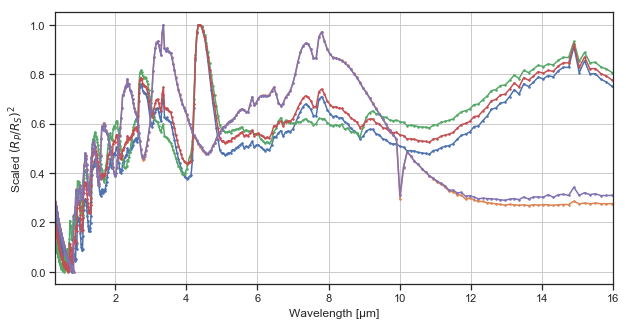

In [8]:
plt.figure(figsize=(10,5))

for i in range(n):
    y = df[i].values.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1)).fit(y)
    y = scaler.transform(y)

    plt.plot(df.x, y, '.-', ms=3)
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'Scaled $(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')


#plt.xscale('log')

plt.xlim((0.3,16))

# Look at the params

In [9]:
params = [pd.DataFrame(data[i]['param'], index=[0]) for i in tqdm(range(len(data)))]

100%|██████████| 1250000/1250000 [11:23<00:00, 1828.41it/s]


In [10]:
%%time
params = pd.concat(params)
params.head()

CPU times: user 2min 2s, sys: 4.78 s, total: 2min 6s
Wall time: 2min 7s


In [11]:
params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250000 entries, 0 to 0
Data columns (total 7 columns):
planet_mass            1250000 non-null float64
temperature_profile    1250000 non-null float64
ch4_mixratio           1250000 non-null float64
planet_radius          1250000 non-null float64
h2o_mixratio           1250000 non-null float64
co2_mixratio           1250000 non-null float64
co_mixratio            1250000 non-null float64
dtypes: float64(7)
memory usage: 76.3 MB


In [12]:
params.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,2.656956e+27,1.500297e+03,1.201539e-02,8.039690e+07,1.200086e-02,1.202782e-02,1.195297e-02
std,7.268432e+26,3.188851e+02,2.975760e-02,1.561777e+07,2.974033e-02,2.977589e-02,2.967776e-02
min,1.518400e+27,1.000000e+03,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.024533e+27,1.222222e+03,3.593814e-07,6.680384e+07,3.593814e-07,3.593814e-07,3.593814e-07
50%,2.530667e+27,1.555556e+03,7.742637e-05,8.311641e+07,7.742637e-05,1.291550e-05,7.742637e-05
75%,3.289867e+27,1.777778e+03,2.782559e-03,9.399146e+07,2.782559e-03,2.782559e-03,2.782559e-03
max,3.796000e+27,2.000000e+03,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01


In [13]:
# Transform mixratios to logarithmic

for param in params:
    if 'mixratio' in param:
        params[param] = np.log(params[param])

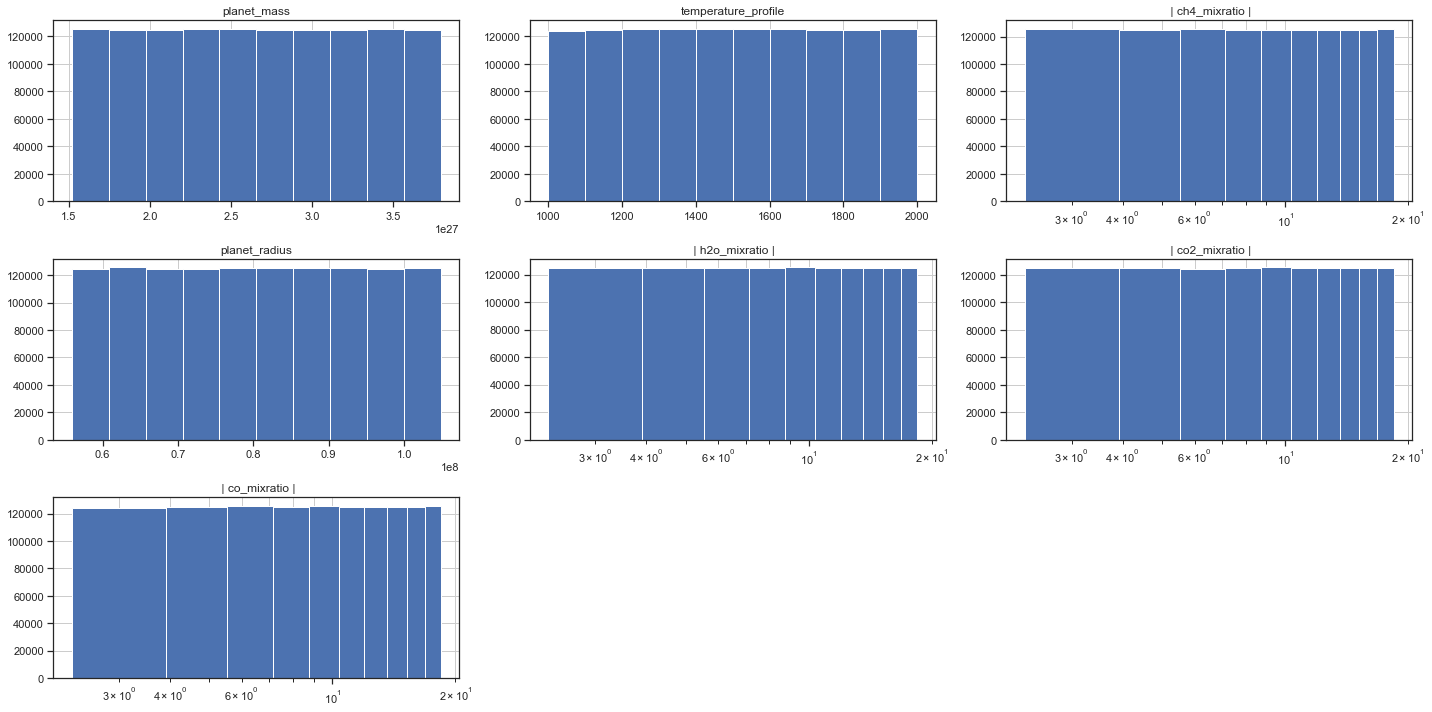

In [14]:
plt.figure(figsize=(20,10))

for i, param in enumerate(params.columns):
    plt.subplot(3,3,i+1)
    plt.grid(True, which="both", ls='-')
    
    if 'mixratio' in param:
        plt.title(r' | %s |' % param)
        plt.hist(np.abs(params[param]), bins=10)
        plt.xscale('log')
    else:
        plt.title(param)
        plt.hist(params[param], bins=10)

plt.tight_layout()

In [15]:
params.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,2.656956e+27,1.500297e+03,-1.035918e+01,8.039690e+07,-1.036068e+01,-1.036265e+01,-1.036495e+01
std,7.268432e+26,3.188851e+02,5.146084e+00,1.561777e+07,5.143733e+00,5.144530e+00,5.142658e+00
min,1.518400e+27,1.000000e+03,-1.842068e+01,5.592880e+07,-1.842068e+01,-1.842068e+01,-1.842068e+01
25%,2.024533e+27,1.222222e+03,-1.483888e+01,6.680384e+07,-1.483888e+01,-1.483888e+01,-1.483888e+01
50%,2.530667e+27,1.555556e+03,-9.466183e+00,8.311641e+07,-9.466183e+00,-1.125708e+01,-9.466183e+00
75%,3.289867e+27,1.777778e+03,-5.884384e+00,9.399146e+07,-5.884384e+00,-5.884384e+00,-5.884384e+00
max,3.796000e+27,2.000000e+03,-2.302585e+00,1.048665e+08,-2.302585e+00,-2.302585e+00,-2.302585e+00
